## Detecção de fraudes em transações de cartão de crédito: análise de modelos de machine learning.

> *Trabalho de Conclusão de Curso (TCC) apresentado e aprovado no MBA em Data Science e Analytics da USP/Esalq, com nota 9,5.*

O crescimento do uso de cartões de crédito aumentou a incidência de fraudes financeiras, tornando essencial o desenvolvimento de soluções eficazes para sua detecção. Este trabalho teve como objetivo desenvolver e avaliar modelos de aprendizado de máquina para identificar transações fraudulentas com maior eficiência e precisão. 

Para isso, foram utilizados os algoritmos K-Nearest Neighbors (KNN), Random Forest e Gradient Boosting, treinados e comparados por meio das métricas precisão, recall e F-score. A metodologia envolveu a seleção das variáveis preditoras mais relevantes, o balanceamento da base de dados para lidar com a desproporção entre transações fraudulentas e não fraudulentas, além da análise do impacto dessas estratégias no desempenho dos modelos. 

Os resultados demonstraram que o algoritmo KNN apresentou um melhor equilíbrio entre precisão e recall, mostrando-se mais adequados para a detecção de fraudes. Conclui-se que abordagens baseadas em aprendizado de máquina podem aprimorar a segurança dos sistemas financeiros, reduzindo perdas e aumentando a eficiência na identificação de transações suspeitas.

### 1. Importando Bibliotecas

In [91]:
# Manipulação e Análise
import pandas as pd
import numpy as np

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import StandardScaler, RobustScaler

# Testes de Hipóteses
from scipy.stats import shapiro, kstest

# Modelagem e Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas de Avaliação
from sklearn.metrics import precision_score, recall_score, f1_score


### 2. Importando os Dados

In [92]:
creditcard = pd.read_csv('creditcard.csv')

In [93]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [94]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 3. Análise Descritiva

In [51]:
pd.options.display.float_format = "{:.4f}".format

In [52]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [53]:
describe = creditcard.describe().T

In [54]:
describe

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


A análise descritiva das variáveis revela a distribuição dos dados em termos de medidas estatísticas centrais e de dispersão. A variável Time apresenta média de aproximadamente 94.814 e desvio padrão de 47.488, indicando a variação temporal das transações registradas. A variável Amount, que representa o valor da transação, possui uma média de 88,35 e um desvio padrão elevado de 250,12, evidenciando uma ampla dispersão nos valores das transações financeiras.

As variáveis V1 a V28 possuem média próxima de zero e diferentes magnitudes de desvio padrão, o que indica que passaram por um processo de transformação que centralizou os valores. Os valores mínimos e máximos dessas variáveis demonstram a presença de uma ampla variação entre os dados, e os quartis revelam a distribuição dessas variações dentro do conjunto analisado. Como as variáveis V1 a V28 não possuem uma descrição explícita de seu significado original, apenas suas distribuições estatísticas podem ser observadas.

Além disso, como as variáveis Time e Amount não passaram pela transformação via PCA, foi necessário avaliar suas distribuições de forma específica.

In [88]:
describe.to_excel("creditcard_describe.xlsx", sheet_name="creditcard_describe")

In [89]:
# Verificar registros nulos
creditcard.isnull().sum().max()

np.int64(0)

##### Proporação de Fraudes

In [90]:
print('Sem Fraude', round(creditcard['Class'].value_counts()[0]/len(creditcard) * 100,2),'% da base')
print('Fraude', round(creditcard['Class'].value_counts()[1]/len(creditcard) * 100,2),'% da base')

Sem Fraude 99.83 % da base
Fraude 0.17 % da base


Nota: Observe como o conjunto de dados original está desequilibrado! A maioria das transações não é fraudulenta. Se usarmos esse dataframe como base para nossos modelos preditivos e análises, poderemos obter muitos erros e nossos algoritmos provavelmente se ajustarão demais, pois "assumirão" que a maioria das transações não são fraudes. Mas não queremos que nosso modelo assuma, queremos que nosso modelo detecte padrões que dêem indícios de fraude!

##### Distribuição dos Dados

/var/folders/wt/_hm9npcx6xnbt_qw03pfvm940000gn/T/ipykernel_7030/1222107414.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/var/folders/wt/_hm9npcx6xnbt_qw03pfvm940000gn/T/ipykernel_7030/1222107414.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val

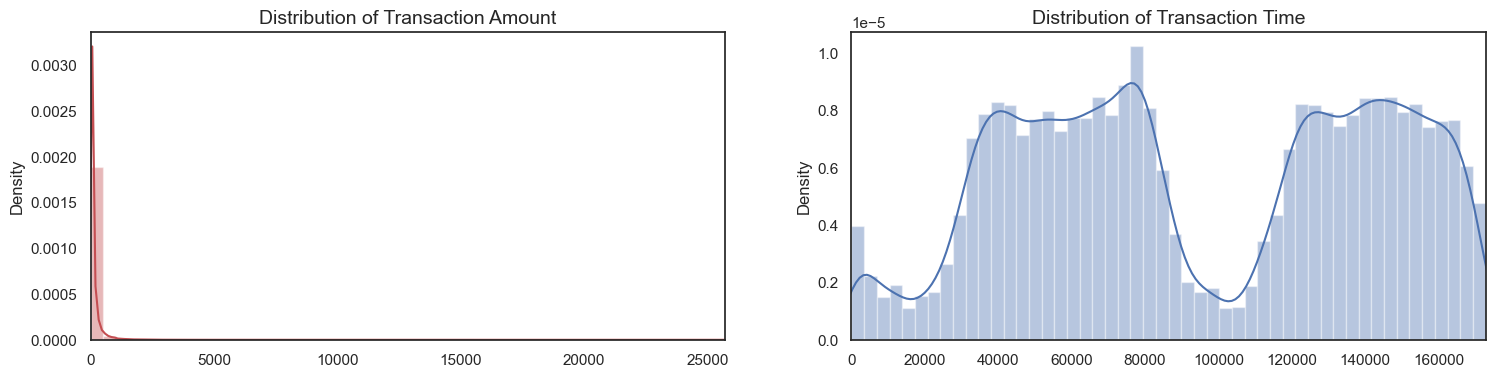

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = creditcard['Amount'].values
time_val = creditcard['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Distribuições: Ao ver as distribuições podemos ter uma ideia de quão distorcidas são essas características, também podemos ver distribuições adicionais das outras características. Existem técnicas que podem ajudar as distribuições a serem menos distorcidas que serão implementadas neste notebook no futuro.

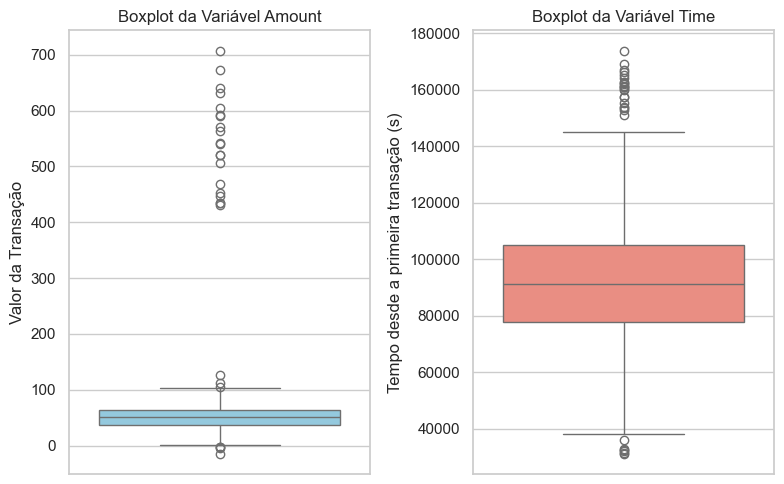

In [98]:
np.random.seed(42)
amount = np.concatenate([np.random.normal(50, 20, 1000), np.random.normal(500, 100, 20)])
time = np.concatenate([np.random.normal(90000, 20000, 1000), np.random.normal(160000, 5000, 20)])

df_simulado = pd.DataFrame({
    'Amount': amount,
    'Time': time
})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_simulado['Amount'], color="skyblue")
plt.title('Boxplot da Variável Amount')
plt.ylabel('Valor da Transação')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_simulado['Time'], color="salmon")
plt.title('Boxplot da Variável Time')
plt.ylabel('Tempo desde a primeira transação (s)')
plt.xlabel('')

plt.tight_layout()
plt.show()


Com base na análise exploratória realizada por meio de gráficos de caixa (boxplots), observou-se a presença de diversos outliers nas variáveis Time e, especialmente, Amount, o que pode comprometer o desempenho de algoritmos sensíveis à escala dos dados. O mostra essa distribuição, evidenciando a assimetria e a existência de valores extremos expressivos, principalmente nos valores monetários das transações.

Diante desse cenário, foi adotado o método **RobustScaler**, da biblioteca Scikit-learn, como técnica de escalonamento das variáveis Time e Amount. O RobustScaler realiza a normalização com base na mediana e na amplitude interquartílica (IQR), sendo mais adequado para conjuntos de dados que apresentam valores extremos, por reduzir o impacto de outliers na transformação das variáveis.

### 4. Escalonamento

In [100]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard['scaled_time'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1,1))

creditcard.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = creditcard['scaled_amount']
scaled_time = creditcard['scaled_time']

creditcard.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
creditcard.insert(0, 'scaled_amount', scaled_amount)
creditcard.insert(1, 'scaled_time', scaled_time)

creditcard.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.7833,-0.9950,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,...,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,0
1,-0.2698,-0.9950,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,...,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,0
2,4.9837,-0.9950,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,...,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,0
3,1.4183,-0.9950,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,...,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,0
4,0.6706,-0.9950,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,...,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,0


Após a aplicação do escalonamento, as variáveis originais foram removidas do conjunto de dados e substituídas pelas colunas scaled_time e scaled_amount. Essa transformação garantiu que todas as variáveis estivessem em escalas compatíveis, o que contribui diretamente para o desempenho dos métodos de classificação e para a estabilidade das métricas de avaliação, como demonstrado nas análises subsequentes.

### 5. Subamostragem Aleatória (Random Under-Sampling)

O balanceamento das classes foi realizado utilizando a técnica de Random Under- Sampling. Essa abordagem consiste em reduzir o número de instâncias da classe majoritária até que se iguale ao número de instâncias da classe minoritária, criando um conjunto de dados balanceado. 

Para isso, foi identificado o número de transações fraudulentas (classe minoritária) e, em seguida, selecionadas aleatoriamente a mesma quantidade de instâncias da classe não fraudulenta (classe majoritária).

 Os dados foram embaralhados para garantir que o treinamento do modelo ocorresse de forma uniforme e livre de viés. Essa técnica foi utilizada para reduzir os impactos do desbalanceamento no treinamento dos modelos, uma prática recomendada em problemas de aprendizado supervisionado com classes desbalanceadas.

In [101]:
df = creditcard.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
119290,-0.1703,-0.1092,-0.7589,1.2600,1.1846,0.0142,-0.4365,-0.9469,0.3447,0.3801,...,-0.0232,-0.1868,-0.6367,0.0523,0.3489,-0.1791,0.0750,0.1353,0.0583,0
44001,10.9064,-0.5046,-2.1444,1.0735,-2.7737,1.3844,-4.0155,0.7472,1.5256,0.1930,...,0.6681,0.1447,-0.8857,0.6251,0.0965,-0.1895,0.5329,0.4230,-0.2103,1
244975,0.7509,0.7973,1.9286,-0.3546,-1.0503,0.1338,-0.1470,-0.7075,-0.0056,-0.1608,...,-0.0440,-0.4335,-1.4826,0.5161,0.6029,-0.7268,-0.0145,-0.0888,-0.0306,0
112840,0.3218,-0.1394,-1.1115,-0.2576,2.2502,1.1527,0.4329,1.2541,-0.5842,-0.6097,...,-0.5106,0.8629,0.9278,-0.3431,-0.2563,-0.6007,-0.1803,0.0268,-0.3583,1
274382,-0.3074,0.9550,-5.7669,-8.4022,0.0565,6.9510,9.8806,-5.7732,-5.7489,0.7217,...,2.4932,0.8804,-0.1304,2.2415,0.6653,-1.8900,-0.1208,0.0733,0.5838,1


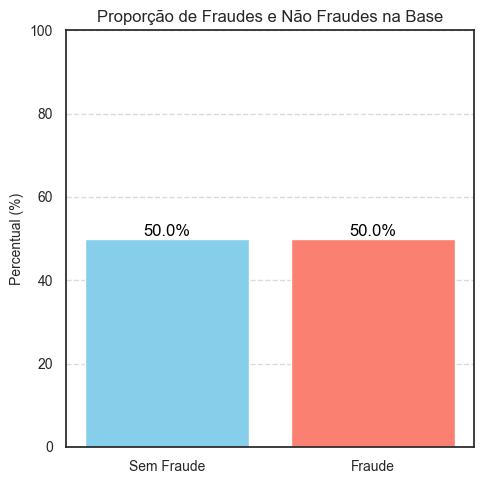

In [114]:
class_counts = new_df['Class'].value_counts()
percentages = (class_counts / len(new_df) * 100).round(2)
categories = ['Sem Fraude', 'Fraude']

plt.figure(figsize=(5, 5))
colors = ['skyblue', 'salmon']
plt.bar(categories, percentages, color=colors)

for i, v in enumerate(percentages):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontsize=12, color='black')

plt.title('Proporção de Fraudes e Não Fraudes na Base', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 6. Seleção de Variáveis

A seleção das variáveis para o modelo de classificação foi realizada com base na análise de correlação entre as variáveis preditoras e a variável alvo. Inicialmente, foi aplicado o teste de normalidade de Shapiro-Wilk e o Kolmogorov-Smirnov para verificar a distribuição dos dados. 

O teste de **Shapiro-Wilk** é amplamente utilizado para avaliar se uma amostra segue uma distribuição normal, sendo recomendado para amostras menores (inferiores a 2.000 observações). Este teste calcula uma estatística de teste W, que compara a distribuição dos dados com a distribuição normal. A hipótese nula (𝐻0) do teste é que os dados seguem uma distribuição normal, enquanto a hipótese alternativa (𝐻1) é que os dados não seguem uma distribuição normal. O valor de W é calculado com base na comparação entre a distribuição observada e a distribuição normal esperada. Para analisar os resultados, se o valor-p obtido for menor do que o nível de significância (comumente 0,05), rejeita-se a hipótese nula, indicando que os dados não seguem uma distribuição normal.

O teste de **Kolmogorov-Smirnov** é utilizado para comparar a distribuição empírica dos dados com uma distribuição teórica específica. Esse teste é adequado para amostras maiores e calcula a estatística D, que é a maior diferença absoluta entre a distribuição empírica acumulada dos dados e a distribuição acumulada teórica. A hipótese nula do teste é que os dados seguem a distribuição teórica especificada (normal, por exemplo), e a hipótese alternativa é que os dados não seguem essa distribuição. Assim como no teste de Shapiro- Wilk, se o valor-p for menor que 0,05, a hipótese nula é rejeitada, sugerindo que os dados não seguem a distribuição teórica. Este teste é particularmente útil quando a normalidade não pode ser assumida de forma explícita, como em grandes amostras, e permite a comparação de dados com diferentes distribuições teóricas.

Com base nos resultados desses testes, foi definida a métrica de correlação a ser utilizada. Para variáveis que apresentaram distribuição normal, foi aplicada a correlação de Pearson, que mede a relação linear entre as variáveis, sendo amplamente utilizada quando os dados seguem uma distribuição normal.

Para as variáveis que não apresentaram normalidade, utilizou-se a correlação de Spearman, que avalia a relação monotônica entre as variáveis, sendo mais robusta para distribuições não normais e relações não lineares.

Para a seleção das variáveis preditoras, foram consideradas apenas aquelas que apresentaram correlação moderada a forte com a variável alvo, ou seja, coeficientes superiores a 0.5 em valor absoluto.


##### 6.1 Avaliar Distribuição

In [ ]:

variaveis = [f'V{i}' for i in range(1, 29)]

resultados_shapiro = {}
resultados_ks = {}

for var in variaveis:
    data = new_df[var].dropna() 

    # Teste de Shapiro-Wilk
    stat_sw, p_sw = shapiro(data) 
    interpretacao_sw = "Segue distribuição normal" if p_sw > 0.05 else "Não segue distribuição normal"
    resultados_shapiro[var] = {'Shapiro-Wilk p-valor': p_sw, 'Interpretação': interpretacao_sw}

    # Teste de Kolmogorov-Smirnov
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))
    interpretacao_ks = "Segue distribuição normal" if p_ks > 0.05 else "Não segue distribuição normal"
    resultados_ks[var] = {'Kolmogorov-Smirnov p-valor': p_ks, 'Interpretação': interpretacao_ks}

# Filtrar apenas as variáveis que seguem distribuição normal
normal_shapiro = {k: v for k, v in resultados_shapiro.items() if v['Interpretação'] == 'Segue distribuição normal'}
normal_ks = {k: v for k, v in resultados_ks.items() if v['Interpretação'] == 'Segue distribuição normal'}

df_normal_shapiro = pd.DataFrame(normal_shapiro).T
df_normal_ks = pd.DataFrame(normal_ks).T

print("\nVariáveis que seguem distribuição normal (Shapiro-Wilk):")
print(df_normal_shapiro)

print("\nVariáveis que seguem distribuição normal (Kolmogorov-Smirnov):")
print(df_normal_ks)



Variáveis que seguem distribuição normal (Shapiro-Wilk):
    Shapiro-Wilk p-valor              Interpretação
V13               0.0648  Segue distribuição normal

Variáveis que seguem distribuição normal (Kolmogorov-Smirnov):
    Kolmogorov-Smirnov p-valor              Interpretação
V13                     0.3842  Segue distribuição normal
V15                     0.0651  Segue distribuição normal


A variável V13 foi a única a apresentar distribuição normal, com p-valores de 0,09775 no teste de Shapiro-Wilk e 0,40678 no teste de Kolmogorov-Smirnov. No entanto, a correlação dessa variável com a variável alvo não foi suficiente para sua inclusão no modelo. Em razão da predominância de variáveis com distribuição não normal, foi utilizada a **correlação de Spearman** para avaliar a relação monotônica entre as variáveis.

##### 6.2 Matriz de Correlação

Foram selecionadas as variáveis que apresentaram correlação acima de 0,5 ou abaixo de -0,5 com a variável alvo.

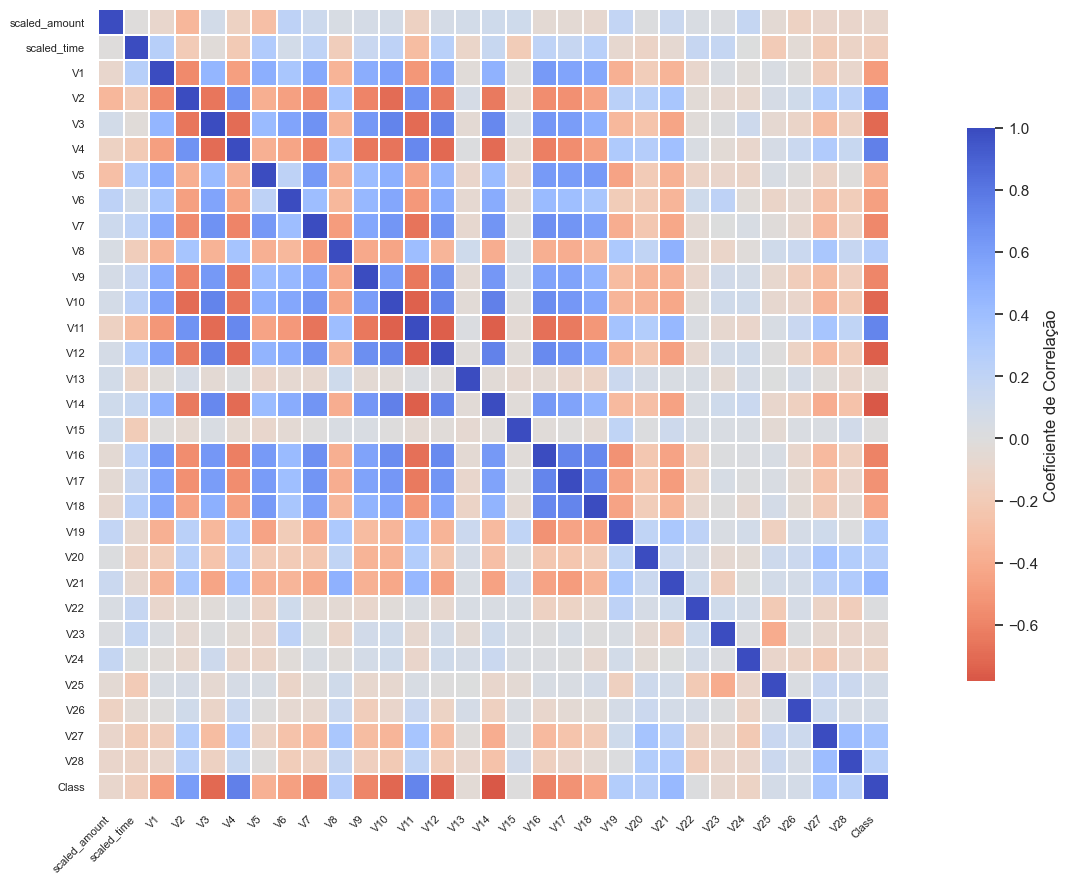

In [103]:
plt.figure(figsize=(16, 9))
sns.set(style="white")

corr = new_df.corr(method='spearman')

heatmap = sns.heatmap(
    corr,
    cmap="coolwarm_r",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.7, "label": "Coeficiente de Correlação"},
    xticklabels=True,
    yticklabels=True,
    linewidths=0.1,
)

plt.title("", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.show()


In [ ]:

variaveis = new_df.columns.tolist()
variaveis.remove('Class')

# Calculando a correlação de Pearson e Spearman
correlacao_pearson = new_df[variaveis + ['Class']].corr(method='pearson')['Class'].drop('Class')
correlacao_spearman = new_df[variaveis + ['Class']].corr(method='spearman')['Class'].drop('Class')

# Filtrando apenas as variáveis com correlação forte/moderada (> 0.5 ou < -0.5)
correlacao_forte_pearson = correlacao_pearson[abs(correlacao_pearson) > 0.5]
correlacao_forte_spearman = correlacao_spearman[abs(correlacao_spearman) > 0.5]

print("Correlações de Pearson acima de 0.5 ou abaixo de -0.5:")
print(correlacao_forte_pearson.sort_values(ascending=False))

print("\n Correlações de Spearman acima de 0.5 ou abaixo de -0.5:")
print(correlacao_forte_spearman.sort_values(ascending=False))


Correlações de Pearson acima de 0.5 ou abaixo de -0.5:
V4     0.7061
V11    0.6875
V9    -0.5542
V17   -0.5586
V3    -0.5656
V16   -0.5973
V10   -0.6274
V12   -0.6803
V14   -0.7510
Name: Class, dtype: float64

 Correlações de Spearman acima de 0.5 ou abaixo de -0.5:
V4     0.7548
V11    0.7265
V2     0.6008
V17   -0.5331
V7    -0.5852
V9    -0.5924
V16   -0.6027
V3    -0.7120
V10   -0.7182
V12   -0.7515
V14   -0.7806
Name: Class, dtype: float64


Essas variáveis foram selecionadas por apresentarem uma forte relação com a variável alvo, o que facilita a discriminação entre transações fraudulentas e não fraudulentas. Com base nesse conjunto de variáveis, os modelos de classificação foram treinados e avaliados.

Variáveis selecionadas: 'V4','V11','V2','V17','V7','V9','V16','V3','V10','V12','V14'

### 7. Treino e Teste

In [68]:
var_df = new_df[['V4','V11','V2','V17','V7','V9','V16','V3','V10','V12','V14','Class']]

In [69]:
var_df.head()

,V4,V11,V2,V17,V7,V9,V16,V3,V10,V12,V14,Class
119290,0.0142,-0.6137,1.2600,-0.2058,0.3447,-0.5099,0.3401,1.1846,-0.5300,-0.0883,0.5315,0
44001,1.3844,4.3548,1.0735,-4.6747,1.5256,-2.4319,-2.9011,-2.7737,-4.1558,-2.8724,-4.5557,1
244975,0.1338,-0.6983,-0.3546,-0.6151,-0.0056,0.5853,0.5186,-1.0503,0.0558,0.0608,0.4056,0
112840,1.1527,0.8264,-0.2576,0.5705,-0.5842,1.0146,-1.2430,2.2502,0.3345,0.1969,-0.4720,1
274382,6.9510,-1.4751,-8.4022,0.3275,-5.7489,-1.0763,-0.6744,0.0565,2.6887,-0.0505,0.9843,1


In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

Foi adotada a divisão de 70% dos dados para treinamento e 30% para teste, uma prática comum e amplamente utilizada  Essa proporção representa um equilíbrio entre fornecer ao modelo dados suficientes para aprender e manter uma quantidade razoável de dados para avaliação. Com 30% dos dados reservados para teste, é possível obter uma avaliação robusta do desempenho do modelo em dados não vistos.

O conjunto de treino é destinado ao ajuste dos parâmetros do modelo ou simplesmente para o modelo aprender, enquanto o conjunto de teste serve para validar seu desempenho ou verificar se ele generaliza. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Para realizar a previsão, serão implementados três modelos de aprendizado de máquina: K-Nearest Neighbors (KNN), Random Forest e Gradient Boosting.

- O K-Nearest Neighbors (KNN) é um método de aprendizado supervisionado baseado na ideia de que instâncias semelhantes tendem a pertencer à mesma classe;
- O Random Forest é um algoritmo de aprendizado de máquina usado para classificação, ou seja, para atribuir uma classe ou categoria a uma nova observação com base nos dados de treinamento;
- O Gradient Boosting é um algoritmo de aprendizado de máquina baseado em ensemble que constrói modelos de forma sequencial, ou seja, ele cria várias Árvores de Decisão em etapas.


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

results = {}

y_pred_rf, y_pred_gb, y_pred_knn = None, None, None

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if model_name == 'Random Forest':
        y_pred_rf = y_pred
    elif model_name == 'Gradient Boosting':
        y_pred_gb = y_pred
    elif model_name == 'KNN':
        y_pred_knn = y_pred
    
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    results[model_name] = {"Precision": precision, "Recall": recall, "F1-Score": f1}

### 8. Avaliação e Conclusão

Para a avaliação do desempenho dos modelos de classificação implementados, foram selecionados três métricas amplamente utilizadas em problemas de classificação binária: Precision, Recall e F-Score.

- Precision (ou Precisão) mede a proporção de verdadeiros positivos em relação ao total de positivos preditos pelo modelo.
- O Recall, também conhecido como sensibilidade, calcula a proporção de verdadeiros positivos em relação ao total de positivos reais.
- O F-Score fornece uma métrica balanceada que considera tanto os falsos positivos quanto os falsos negativos, sendo particularmente útil quando há um trade-off entre precisão e recall.

In [ ]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print()

Model: Random Forest
  Precision: 0.9423
  Recall: 0.9462
  F1-Score: 0.9424

Model: Gradient Boosting
  Precision: 0.9450
  Recall: 0.9487
  F1-Score: 0.9457

Model: K-Nearest Neighbors (KNN)
  Precision: 0.9467
  Recall: 0.9506
  F1-Score: 0.9459



Os resultados obtidos na avaliação dos métodos Random Forest, Gradient Boosting e K-Nearest Neighbors (KNN), com base nas métricas de precision, recall e F1-Score, indicaram que o modelo KNN apresentou o melhor desempenho geral. Esse modelo mostrou sua capacidade de identificar corretamente as transações fraudulentas e, ao mesmo tempo, manter uma taxa reduzida de falsos positivos.

Esses resultados demonstram que todos os métodos utilizados são viáveis para a tarefa, mas o KNN se destacou pelo equilíbrio entre suas métricas. O Gradient Boosting também mostrou desempenho consistente, o que reforça sua utilidade. Já o Random Forest, embora tenha apresentado a menor pontuação entre os três, ainda obteve métricas elevadas, mantendo-se como uma alternativa robusta, especialmente em cenários com dados mais complexos ou sujeitos a ruído.

Considerando o contexto de transações financeiras, no qual tanto os falsos positivos quanto os falsos negativos podem gerar impactos significativos, a escolha do modelo ideal deve priorizar o equilíbrio entre identificar corretamente fraudes reais e evitar alertas falsos. Nesse sentido, o KNN apresentou a combinação mais eficiente, sendo o mais adequado para este estudo.

<div style="text-align:right;">
Mariana Caetano Vidal
    <br>
    Agosto, 2025.